# CA2: Data Analysis with Pandas, Matplotlib and Seaborn


**Name: Andrew Dillon Poh Jie Hao**

**Admin No.: 2227168**

**Class: EP0302/04**

**Problem Statement: How can we make the perfect video game?**

<span style="color:red; font-size:medium; font-weight:bold">*Do be patient when running the notebook. It will take some time for all the datasets to load and plots to generate.
</span>


<div style='font-size: 60px; font-family: Georgia; font-weight:bold; text-align: center; padding-bottom:60px; padding-top:60px'>The Perfect Video Game</div>

<div style='font-size: 20px; font-family: Calibri; font-weight:bold; text-align: center; padding-bottom:20px'>A report by Andrew Poh</div>

<h2 style="color:#3d4a01; font-size:large; font-weight:bold">Introduction:</h2>

Video games are prevalent in today's world. Both children and adults enjoy a brief escape into an alternate reality, or use it as a form of bonding with their friends and family. Due to this demand for video games, many of the biggest companies have turned their attention towards the video game market. Before companies can start investing their resources into a huge project like creating a video game, they must first figure out what exactly helps make a video game popular. This report looks at past data on video games to find out characteristics of video games that will help us to derive the formula to the perfect video game.

<h2 style="color:#3d4a01; font-size:large; font-weight:bold">Scenario:</h2>

As a researcher for a company, I will be looking at historical data on video games to help my company develop the perfect video game. There are a couple key areas I will be looking at to create this perfect game. These are:
- PC Platforms (Windows, MacOS etc.)
- Console Platforms (PS4, XBOX etc.)
- Categories (Action, Strategy etc.)
- Price (Free, \\$10 etc.)
- Publisher (Electronic Arts, Activision etc.)

<h2 style="color:#3d4a01; font-size:large; font-weight:bold">Questions:</h2>

The overarching problem statement is: "How can we make the perfect video game?"
In this questions, we are defining "perfect" as the most successful in terms of popularity and profitability from a business standpoint. As such, this report answer the following questions to pick out the perfect elements for a video game:
- What is the most popular PC platform?
- What is the most popular console platform?
- What are the most popular categories?
- What is the best price point?
- Who is the best publisher?

<h2 style="color:#3d4a01; font-size:large; font-weight:bold">Datasets:</h2>

1. vgsales2019: https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019
2. games-features.csv: https://data.world/craigkelly/steam-game-data/workspace/file?filename=games-features.csv
3. steam_games.csv: https://www.kaggle.com/datasets/nikatomashvili/steam-games-dataset
4. video_game_sales: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

**This report will first briefly introduce the 4 datasets used, followed by 6 analyses using data visualization techniques and finally a conclusion based on the analyses performed.**

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

In [2]:
# Dataset info functions

def rowcol_info(df):
    print(f'There are {len(df)} rows and {len(df.columns)} columns in this dataset')
    print('The columns names are: ')
    for i in range(len(df.columns)):
        print(f' - {df.columns[i]:15s} <class {df.dtypes[i]}> with {len(pd.unique(df[df.columns[i]]))} unique values')
    print()
    
def show_head(df):
    print('First 5 rows of the dataset:')
    print(df.head())
    print()

<div style='font-size: 40px; font-family: Georgia; font-weight:bold; text-align: center; padding-bottom:20px; padding-top:20px; padding-right:15px'>Datasets</div>

<span style="color:#660033; font-size: x-large; font-weight: bold">Dataset 1: vgsales2019.csv</span>.

In [3]:
# import vgsales2019
# https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019 
d1 = pd.read_csv('./data/vgsales2019.csv',
                 sep=',',
                usecols=[1,2,4,7,10,15])

# Remove empty rows
d1 = d1.dropna()

# Change the years to integers
d1['Year'] = d1['Year'].astype('int')

# Subset from year 2011 to 2018
d1 = d1[(d1['Year']>=2012) & (d1['Year']<2019)]

# Remove all rows where the platform occurs less than 100 times total
remove_rows = []
platform_count = d1.groupby('Platform')['Year'].count()

for i in range(len(platform_count)):
    if platform_count[i] < 50:
        remove_rows.append(platform_count.index[i])
        
d1 = d1[~d1.Platform.isin(remove_rows)]

# Remove PC from this dataset as it mainly contains console data
d1 = d1[d1.Platform != 'PC']

In [4]:
pd.set_option('display.width',1000)

# Columns and row information
rowcol_info(d1)

# First 5 rows
show_head(d1)

# Years spanned
start_year = d1['Year'].min()
end_year = d1['Year'].max()
print(f'The data spans across the years {start_year} to {end_year}')

# Genres and platforms
unique_genres = pd.unique(d1[d1.columns[1]])
unique_platforms = pd.unique(d1[d1.columns[2]])
print(f'This dataset includes {len(unique_genres)} different genres of games')
print(f'This dataset includes {len(unique_platforms)} different platforms')
print()

# Critic score statistics
critic_count, critic_mean, critic_std, critic_min, critic_lowerquart, critic_median, critic_upperquart, critic_max = d1.describe()['Critic_Score']
print(f'The mean critic score was {critic_mean:.2f} \nThe median critic score was {critic_median} \nThe upper quartile of the critic scores was above {critic_upperquart} while the lower quartile was below {critic_lowerquart} \nThe maximum critic score was {critic_max} while the minimum was {critic_min} \nThe standard deviation of the critic scores was {critic_std:.2f}')

There are 395 rows and 6 columns in this dataset
The columns names are: 
 - Name            <class object> with 329 unique values
 - Genre           <class object> with 20 unique values
 - Platform        <class object> with 5 unique values
 - Critic_Score    <class float64> with 60 unique values
 - Global_Sales    <class float64> with 164 unique values
 - Year            <class int32> with 7 unique values

First 5 rows of the dataset:
                     Name             Genre Platform  Critic_Score  Global_Sales  Year
20     Grand Theft Auto V            Action      PS4           9.7         19.39  2014
45  Red Dead Redemption 2  Action-Adventure      PS4           9.8         13.94  2018
50     Call of Duty: WWII           Shooter      PS4           8.0         13.40  2017
68                FIFA 18            Sports      PS4           8.3         11.80  2017
76                FIFA 17            Sports      PS4           8.9         10.94  2016

The data spans across the years 2012 

<span style="color:#660033; font-size: x-large; font-weight: bold">Dataset 2: games-features.csv</span>.

In [5]:
# import games-features.csv
# https://data.world/craigkelly/steam-game-data/workspace/file?filename=games-features.csv
d2 = pd.read_csv('./data/games-features.csv',
                 sep=',',
                usecols=[2,4,9,15,17,22,26,27,28,35,36,37,38,43,44,45,46,47,48,49,50,51,52,53,54,55,58])

# Remove non games
d2 = d2[d2['GenreIsNonGame'] == False]

# Convert release dates into datetime formats
d2['ReleaseDate'] = pd.to_datetime(d2['ReleaseDate'],errors='coerce')

# Subset Dates
d2 = d2[(d2['ReleaseDate']>=pd.to_datetime('2012-01-01')) & (d2['ReleaseDate']<pd.to_datetime('2019-01-01'))]

# Remove empty rows
d2 = d2.dropna()
d2 = d2.dropna(subset=['ReleaseDate'])

In [6]:
# Columns and row information
rowcol_info(d2)

# Years spanned
start_year = d2['ReleaseDate'].min()
end_year = d2['ReleaseDate'].max()
print(f'The dataset includes games released between {start_year.strftime("%Y")} to {end_year.strftime("%Y")}')

colnames = d2.columns
genreCols = []
for colname in colnames:
    if colname[:5] == 'Genre':
        genreCols.append(genreCols)

# Other statistics
print(f'This dataset contains {len(pd.unique(d2.QueryName))} different games')
print(f'This dataset contains {len(genreCols)} different genres')

There are 10786 rows and 27 columns in this dataset
The columns names are: 
 - QueryName       <class object> with 10773 unique values
 - ReleaseDate     <class datetime64[ns]> with 1261 unique values
 - Metacritic      <class int64> with 68 unique values
 - SteamSpyOwners  <class int64> with 1921 unique values
 - SteamSpyPlayersEstimate <class int64> with 1538 unique values
 - IsFree          <class bool> with 2 unique values
 - PlatformWindows <class bool> with 2 unique values
 - PlatformLinux   <class bool> with 2 unique values
 - PlatformMac     <class bool> with 2 unique values
 - CategorySinglePlayer <class bool> with 2 unique values
 - CategoryMultiplayer <class bool> with 2 unique values
 - CategoryCoop    <class bool> with 2 unique values
 - CategoryMMO     <class bool> with 2 unique values
 - GenreIsNonGame  <class bool> with 1 unique values
 - GenreIsIndie    <class bool> with 2 unique values
 - GenreIsAction   <class bool> with 2 unique values
 - GenreIsAdventure <class boo

<span style="color:#660033; font-size: x-large; font-weight: bold">Dataset 3: steam_games.csv</span>.

In [7]:
# import steam_games.csv
# https://www.kaggle.com/datasets/nikatomashvili/steam-games-dataset

d3 = pd.read_csv('./data/steam_games.csv',
                 sep=',',
                usecols=[0,1,3,9])

# Convert release dates into datetime formats
d3['Release Date'] = pd.to_datetime(d3['Release Date'],errors='coerce')

# Subset Dates
d3 = d3[(d3['Release Date']>=pd.to_datetime('2014-01-01')) & (d3['Release Date']<pd.to_datetime('2019-01-01'))]

# Change commas to decimals in Original Price
d3['Original Price'] = d3['Original Price'].str.replace(',','.')

# Change 'Free' to 0 in Original Price column
d3.loc[d3["Original Price"] == "Free", "Original Price"] = '$0.00'

# Remove the $ sign for all prices
d3['Original Price'] = d3['Original Price'].str.slice(1,5)

# Convert Original Price column to float
d3['Original Price'] = d3['Original Price'].astype('float')

# Extract reviews from review column
d3['All Reviews Number'] = d3['All Reviews Number'].str.slice(2,4)

# Remove empty rows
d3 = d3.dropna()

# Convert all reviews from strings to integer
d3['All Reviews Number'] = d3['All Reviews Number'].astype('int')

# Remove extreme values
d3 = d3[d3['All Reviews Number'] > 40]
d3 = d3[d3['Original Price'] < 80]

In [8]:
pd.set_option('display.width',1000)

# Columns and row information
rowcol_info(d3)

# First 5 rows
show_head(d3)

# Years spanned
start_year = d3['Release Date'].min()
end_year = d3['Release Date'].max()
print(f'The dataset includes games released between {start_year.strftime("%Y")} to {end_year.strftime("%Y")}')

# Review score statistics
review_count, review_mean, review_std, review_min, review_lowerquart, review_median, review_upperquart, review_max = d3['All Reviews Number'].describe()
print(f'The mean review score was {review_mean:.2f} \nThe median review score was {review_median} \nThe upper quartile of the review scores was {review_upperquart} \nThe lower quartile of the review scores was {review_lowerquart} \nThe maximum review score was {review_max} while the minimum was {review_min} \nThe standard deviation of the review scores was {review_std:.2f}')

There are 1491 rows and 4 columns in this dataset
The columns names are: 
 - Title           <class object> with 1491 unique values
 - Original Price  <class float64> with 102 unique values
 - Release Date    <class datetime64[ns]> with 839 unique values
 - All Reviews Number <class int32> with 54 unique values

First 5 rows of the dataset:
                              Title  Original Price Release Date  All Reviews Number
5               PUBG: BATTLEGROUNDS             0.0   2017-12-21                  57
8                              Rust            19.9   2018-02-08                  87
10               Grand Theft Auto V            33.9   2015-04-13                  86
11  Tom Clancy's Rainbow Six® Siege            10.9   2015-12-01                  86
12                 Dead by Daylight            12.5   2016-06-14                  80

The dataset includes games released between 2014 to 2018
The mean review score was 85.24 
The median review score was 88.0 
The upper quartile of 

<span style="color:#660033; font-size: x-large; font-weight: bold">Dataset 4: video_game_sales.csv</span>.

In [9]:
# import video_game_sales.csv
# https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

d4 = pd.read_csv('./data/video_game_sales.csv',
                 sep=',',
                usecols=[0,2,4,5,6,7,8,9])

# Drop NA rows
d4 = d4.dropna()

# Change year to integer
d4['Year_of_Release'] = d4['Year_of_Release'].astype('int')

# filter from 2012 onwards
d4 = d4[d4['Year_of_Release']>=2012]

In [10]:
pd.set_option('display.width',1000)

# Columns and row information
rowcol_info(d4)

# First 5 rows
show_head(d4)

# Years spanned
min_year = d4['Year_of_Release'].min()
max_year = d4['Year_of_Release'].max()
print(f'This dataset contains games from {min_year} to {max_year}')

sales_count, sales_mean, sales_std, sales_min, sales_lowerquart, sales_median, sales_upperquart, sales_max = d4['Global_Sales'].describe()
print(f'The mean global sales is {review_mean:.2f} \nThe median global sales was {review_median} \nThe upper quartile of the global sales is {review_upperquart} \nThe lower quartile of the global sales is {review_lowerquart} \nThe highest global sales is {review_max} while the lowest is {review_min} \nThe standard deviation of the global sales is {review_std:.2f}')

There are 2888 rows and 8 columns in this dataset
The columns names are: 
 - Name            <class object> with 1672 unique values
 - Year_of_Release <class int32> with 7 unique values
 - Publisher       <class object> with 183 unique values
 - NA_Sales        <class float64> with 193 unique values
 - EU_Sales        <class float64> with 174 unique values
 - JP_Sales        <class float64> with 95 unique values
 - Other_Sales     <class float64> with 88 unique values
 - Global_Sales    <class float64> with 311 unique values

First 5 rows of the dataset:
                          Name  Year_of_Release             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
16          Grand Theft Auto V             2013  Take-Two Interactive      7.02      9.09      0.98         3.96         21.04
23          Grand Theft Auto V             2013  Take-Two Interactive      9.66      5.14      0.06         1.41         16.27
31   Call of Duty: Black Ops 3             2015           

<div style='font-size: 40px; font-family: Georgia; font-weight:bold; text-align: center; padding-bottom:20px; padding-top:20px'>Analysis</div>

In [11]:
# Set figure size for all plots
sns.set(rc={'figure.figsize':(10,4)})

<span style="color:#652565; font-size: 30px; font-weight: bold">Analysis 1: Console Popularity Across Years (Line Plot)</span>.

*Dataset 1: vgsales2019.csv*

We'll first look at which is the most popular console device. For this analysis, the metric used to measure the popularity of a console will be the number of units games released for that console. If the units games released for a console increases across years, it equals an increase in popularity for the console. A line plot will be used for this analysis.

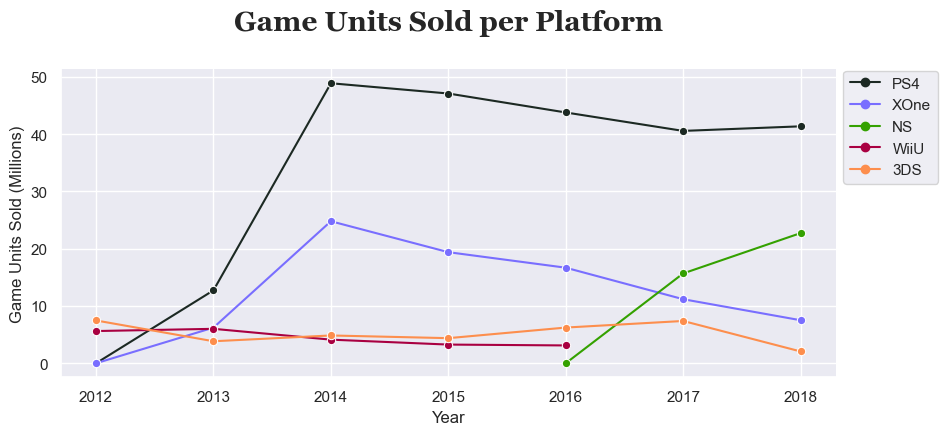

In [12]:
# Count number of times each platform occurs in each year
platform_per_year = d1.groupby(['Platform', 'Year'])['Global_Sales'].sum()

# Iterate through platforms to prepare plot data
platforms = pd.unique(d1['Platform'])

data = []
for platform in platforms:
    row = platform_per_year[platform]
    data.append(row)

# Look for the first year a platform starting selling games and set the previous year as 0
years = np.arange(2012, 2019)
for i in range(len(data)):
    min_year = data[i].index.min()
    if min_year > years.min():
        data[i][min_year-1] = 0
        data[i] = data[i].sort_index()

# Add the platforms back as indexes for the data
data = pd.DataFrame(data)
data = data.set_index([platforms])
data = data.transpose()

# Generate unique colors using https://medialab.github.io/iwanthue/
colors = ["#1c2923",
"#796eff",
"#34a100",
"#a90041",
"#fd8e4d"]

# Create list of ['o']s for markers
def markers_list(colors):
    markers = []
    for i in range(len(colors)):
        markers.append('o')
    return markers

# Set figure color
sns.set_style("ticks")

# Plot
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.lineplot(data=data[platforms], dashes=False, palette=colors, markers=markers_list(colors))

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('Game Units Sold (Millions)')

# Move legend
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.02))

# Set title
titlefont = {'fontname':'Georgia'} # title font
ax.set_title('Game Units Sold per Platform', fontsize=20, weight='bold', x=0.5, y=1.1, **titlefont)

# Remove spines
sns.despine()

plt.show()

### Line Plot Analysis

From the plot above, we see that the WiiU and 3DS are much lower in popularity over 2012 to 2018 compared to the PS4, XBOX One and Nintendo Switch. Hence, we can conclude that the most relevant consoles on the market over the recent years.

However, even among the 3 more popular consoles, there are stark differences in their popularity. The PS4 has been the most popular console since 2013 with approximately twice the number of sales as compared to the XBOX One. The Nintendo Switch had a later start in 2016, but has been growing in popularity since then. As of 2018, the PS4 and XBOX One seem to be dropping in popularity while the Nintendo Switch is growing. In fact, the Nintendo Switch surpassed the XBOX One in 2017 in game units sold.

We do not have sufficient data to get a good estimate of the video game units sold past 2018, and there are not enough data points for us to extrapolate the Nintendo Switch's popularity past 2018. Hence it is difficult to conclude if it will surpass the PS4. However, we can be sure that the PS4 is still significantly more popular than the XBOX One.

### Application to our video game
While developing a game for multiple consoles is possible, it would mean higher production costs as we would have to design the game for different machine architectures. Hence, this data helps us to determine that between developing the video game for the PS4 or the XBOX One, the PS4 would be a much better option given that it has double the game units sold as the XBOX One. While the Nintendo Switch is a potential contender, Nintendo does not usually allow its Intellectual Property to be played on devices other than Nintendo created devices. This would mean releasing the game on Nintendo would remove the entire console and PC audience apart from those who own a Nintendo Switch. Thus, releasing the game on the Switch is out of the question.

##### Conclusion: In terms of consoles, our video game should be released on the PS4.

<span style="color:#652565; font-size: 30px; font-weight: bold">Analysis 2: PC Platform Popularity (Pie Chart)</span>

*Dataset 2: games-features.csv*

There are 3 major PC platforms that video games can be designed to run on: Windows, MacOS and Linux. This analysis will help us to find out which platform is the most popular so we can decide which platform to develop our game for. The dataset used will be of the Steam game library which is the most popular PC game library. We will use the number of players per platform across all games to derive the data for this pie chart. We will also only be using the latest year in the dataset as it is the most relevant to the present gaming landscape.

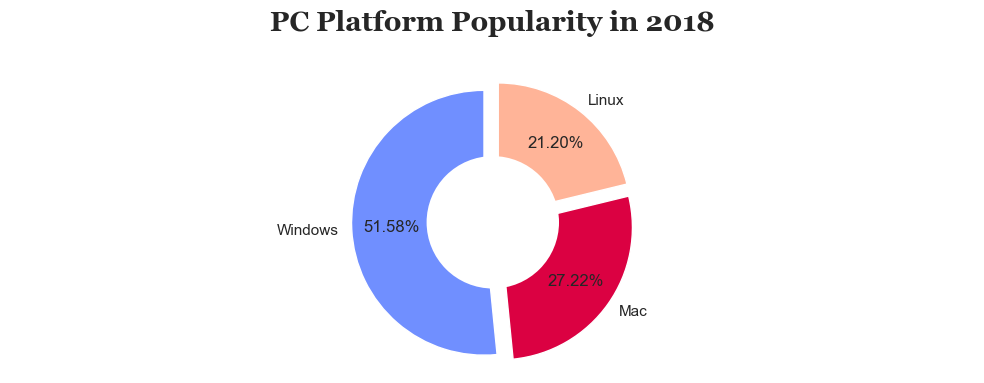

In [13]:
# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
 
# Data Preparation
windows_rows = d2[d2.PlatformWindows == True]
mac_rows = d2[d2.PlatformMac == True]
linux_rows = d2[d2.PlatformLinux == True]

windows_owners = windows_rows['SteamSpyOwners'].agg(np.sum)
mac_owners = mac_rows['SteamSpyOwners'].agg(np.sum)
linux_owners = linux_rows['SteamSpyOwners'].agg(np.sum)

data = [windows_owners, mac_owners, linux_owners]
labels = ['Windows', 'Mac', 'Linux'] 

#Plot
sns.set(rc={'figure.figsize':(10,4)})
colors = ["#708fff",
"#db0142",
"#ffb498"]
explode = (0.2,0.2,0.2)

fig, ax = plt.subplots()

ax.pie(data, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=3, autopct='%1.2f%%',pctdistance=0.7)

#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Remove box outline
ax.axis('off')

# Set title
titlefont = {'fontname':'Georgia'} # title font
ax.set_title('PC Platform Popularity in 2018', fontsize=20, fontweight='bold', x=0.5, y=1.1, **titlefont)
 
plt.axis('equal') # Centre plot
plt.tight_layout()
plt.show()

### Pie Chart Analysis
The chart above shows that Windows is the dominant PC platform with 51% of players using Windows machines while Mac users and Linux users have smaller playerbases that make up 27% and 21% of PC players respectively. In fact, while the graph shows that Windows has 51% of the playerbase, it is likely even higher as most of the games that can run on Mac and Linux machines are also designed to run on Windows machines.

### Application to our video game
As explained earlier, while developing a game for multiple PC platforms is possible, it would mean higher production costs as we would have to design the game for the different machine architectures. Hence, we can determine that the PC platform our game should be designed for is Windows as it has the largest playerbase of all the machines.

##### Conclusion: In terms of PC platforms, our video game should be designed for Windows.

<span style="color:#652565; font-size: 30px; font-weight: bold;">Analysis 3: Ratings for Genres (Boxplot)</span>

*Dataset 2: games-features.csv*

Now that we have gotten hardware out of the way, we should also consider the genre of our game. We will look at the ratings for the genres of the games released using a boxplot to figure out the genre that will be the most well received.

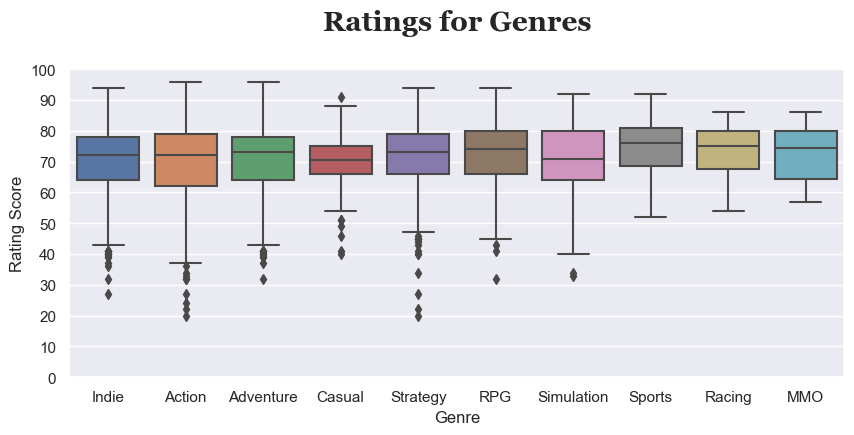

In [14]:
# Get columns of genres
colnames = d2.columns
genreCols = []
for colname in colnames:
#     Remove genres that aren't really genres
    if colname[:5] == 'Genre' and colname != 'GenreIsNonGame' and colname != 'GenreIsEarlyAccess' and colname !='GenreIsFreeToPlay':
        genreCols.append(colname)
        
# Get list of genres
genres = []
for genre in genreCols:
    if genre == 'GenreIsMassivelyMultiplayer': # abbreviate to MMO
        genre = 'GenreIsMMO'
    genres.append(genre[7:])

data = []
for genre in genreCols:
    match_genre = d2[d2[genre] == True]
    genre_rating = match_genre[match_genre['Metacritic'] != 0]
    data.append(genre_rating['Metacritic'])
    
# Plot
sns.set(rc={'figure.figsize':(10,4)})
sns.boxplot(data=data)

# Set title
titlefont = {'fontname':'Georgia'} # title font
plt.title('Ratings for Genres',fontsize=20,fontweight='bold',x=0.5, y=1.1,**titlefont)

# Ticks and labels
plt.xticks(np.arange(0,10), genres)
plt.xlabel('Genre')

plt.yticks(np.arange(0,101,10))
plt.ylabel('Rating Score')

plt.show()

### Boxplot Analysis
This chart shows that the distribution of ratings does indeed vary across genres. Genres like Strategy, Action and Indie tend to have many low scoring outliers, which means that it may be difficult to make a well-received game in these genres. On the other hand, genres like Sports, Racing and MMO seem to have much tighter spreads hovering around the score of 70. This could potentially be attributed to a smaller number of games in these genres, meaning the distribution will not be as spread apart as more popular genres. However, from my knowledge, MMO games are extremely widespread on the Steam library and hence the MMO genre does seem to have a good rating.

In terms of medians and interquartile ranges, most of the genres' medians, lower quartiles and higher quartiles all hover around the 65-80 rating score range. This means that the average game made in all of these genres are still relatively similar in score.

### Application to our video game
In order to pick a 'safe' genre for our video game - meaning there is a low chance of it being poorly received - we should pick a genre that has few low scoring outliers and a tighter distrbution as it would mean that most games in that genre are well received. Hence, we should pick the Sports, Racing or MMO genre for our game as it fits these requirements. However, let us then compare the popularity of each of these genres based on playercount.

##### Conclusion: In terms of genre, our video game should either be a Sports, Racing or MMO game. To decide between these 3, we will dive deeper in the next analysis to check the popularity of these 3 genres based on playercount.

<span style="color:#652565; font-size: 30px; font-weight: bold">Analysis 4: Popularity of Sports, Racing and MMO Genres (Violin Plot)</span>

*Dataset: games-features.csv*

Here, let us compare these 3 genres that we have singled out from the previous analysis and figure out which is the most popular, as well as whether people prefer singleplayer or multiplayer elements for each genre. To recap, the genres we picked out were Sports, Racing and MMO.

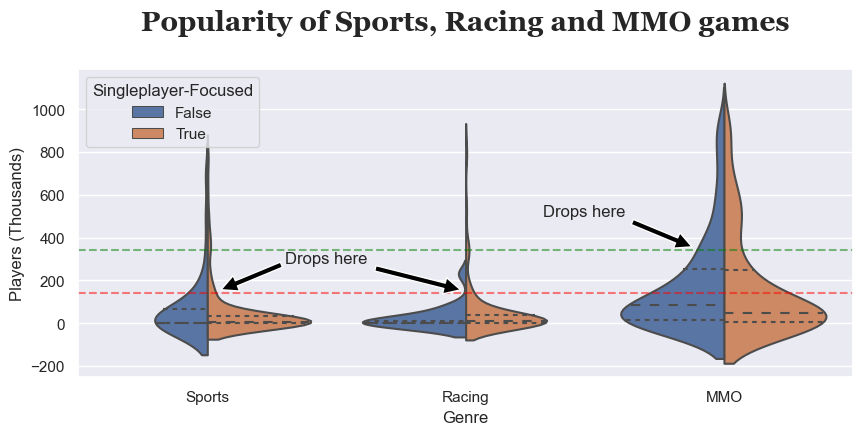

In [15]:
sns.set_theme(style="dark")

genres = ['Sports','Racing','MMO']

# Subset data to only include the selected genres
d2b = d2[d2['GenreIsSports'] | d2['GenreIsRacing'] | d2['GenreIsMassivelyMultiplayer']]

# Reduce columns so it's less confusing
d2b = d2b[['SteamSpyOwners','CategorySinglePlayer','CategoryMultiplayer','GenreIsSports','GenreIsRacing','GenreIsMassivelyMultiplayer']]

# Remove exceptional games which are outliers that we will unlikely reach
d2b = d2b[(d2b['SteamSpyOwners'] <= 1000000)]

d2b['SteamSpyOwners'] = d2b['SteamSpyOwners'].div(1000).round(0)

data_frames = []

# List of genres to consider
genres_list = ['Sports', 'Racing', 'MassivelyMultiplayer']

# Iterate over each genre and filter rows based on the genre condition
for genre in genres_list:
    genre_condition = d2b[f'GenreIs{genre}']
    genre_rows = d2b[genre_condition].copy()  # Create a copy to avoid SettingWithCopyWarning
    genre_rows['Genre'] = genre
    data_frames.append(genre_rows)

# Concatenate the list of DataFrames into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Remove 'GenreIsX' columns
data = data.drop(data.filter(like='GenreIs').columns, axis=1)

# Plot
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.violinplot(data=data, x='Genre', y='SteamSpyOwners', hue='CategorySinglePlayer',
               split=True, inner="quart", fill=False)

# Set Title
titlefont = {'fontname':'Georgia'} # title font
plt.title('Popularity of Sports, Racing and MMO games',fontsize=20,fontweight='bold',x=0.5,y=1.1,**titlefont)

# Labels and Ticks
plt.xticks(np.arange(3),['Sports','Racing','MMO'])
plt.xlabel('Genre')
plt.ylabel('Players (Thousands)')

# Legend
plt.legend(title='Singleplayer-Focused',loc='upper left')

# Annotate words
plt.annotate('', xy=(0.04, 150), xytext=(0.3,280),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Drops here', xy=(1, 150), xytext=(0.3,280),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Drops here', xy=(1.89, 350), xytext=(1.3,500),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Dotted lines
ax.axhline(y=140, color='red', linestyle='--', label='Dotted Line',alpha=0.5)
ax.axhline(y=340, color='green', linestyle='--', label='Dotted Line',alpha=0.5)

plt.show()

*The reason why the y-axis has '-200' is because the violin plot needs space to curve back in. You can see from the lowest dotted lines on each violin that the minimum players is still 0*

### Violon Plot Analysis
The plot shows us that many Sports and Racing Genre games seem to have a very limited audience and tend to stay below the 100,000 total playercount. On the other hand, MMO games seem to have more success with achieving higher playercounts as we can see it the number of games reduce significantly only past the 300,000 playercount.

As for whether people prefer singleplayer or multiplayer games which is shown by the left and right of the violin graph, it seems that for the Sports genre, people tend to enjoy games with singleplayer elements a bit more. For racing, people tend to enjoy the games with multiplayer elements a bit more. Surprisingly, for MMO games, people enjoy the singleplayer and multiplayer elements fairly equally. This is surprising as MMO literally stands for Massively Multiplayer Online, yet many people seem to enjoy the singleplayer parts of MMO games. These singleplayer parts tend to be story-focused.

### Application to our video game
Out of the 3 genres, the MMO genre seems to have the most potential for higher player counts, making it the ideal choice for our game genre. An unexpected point we can draw from this is that MMO gamers enjoy both the multiplayer aspects of the game, as well as the singleplayer story-focused aspects. Hence, we should make sure that the MMO game we create has compelling story elements as well.

##### Conclusion: In terms of genre, our video game should be an MMO game with an emphasis on both multiplayer and story aspects of the game

<span style="color:#652565; font-size: 30px; font-weight: bold">Analysis 5: Reviews against Game Price (Scatter Plot)</span>


*Dataset: steam_games.csv*

In order to figure out the perfect price point for our game, we will look at how happy users have been with previous games via user reviews and see which price points have worked well.

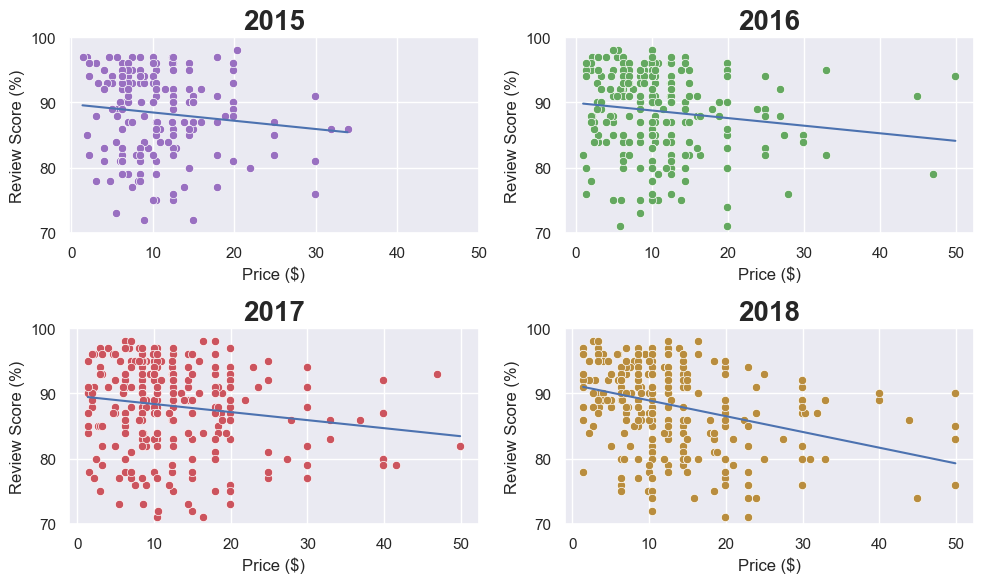

In [16]:
# Remove games below $1.00 because a free game will have many in-game purchases which is frowned upon in the gaming industry
d3a = d3[d3['Original Price'] >= 1.00].copy()

# Format release date as years
d3a['Release Date'] = d3a['Release Date'].dt.strftime('%Y').astype('int')

d3a = d3a[(d3a['Original Price'] < 50) & (d3a['All Reviews Number'] > 70)]

# Function to get data for each year
def subset_year_data(year):
    data = d3a[d3a['Release Date'] == year]
    return data

# Get data for each year
data = []
for i in range(2015,2019):
    year_data = subset_year_data(i)
    data.append(year_data)

# Set figsize
sns.set(rc={'figure.figsize':(10,6)})    

# Create subplots
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

# Plot in each subplot
colors = ['#9970c1','#64a860','#cc545e','#b98d3e']
for i, ax in enumerate(axes):
    reviews = data[i]['All Reviews Number']
    price = data[i]['Original Price']
    date = data[i]['Release Date'].iloc[0]
    
    sns.scatterplot(x=price,y=reviews,ax=ax,color=colors[i])
    ax.set_title(date, fontweight='bold',fontsize=20)
    
    # Labels
    ax.set_xlabel('Price ($)')
    ax.set_ylabel('Review Score (%)')
        
    # Best-fit line
    ax.plot(np.unique(price), np.poly1d(np.polyfit(price, reviews, 1))(np.unique(price)))
    
    # Set limit and ticks. Limit is set twice for the ticks to work properly.
    ax.set_ylim(70, 100)
    ax.set_xticks(np.arange(0, 51, 10))
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_ylim(70, 100)

plt.tight_layout()
plt.show()

### Scatter Plot Analysis
From the plots above, we realise that in 2015 there was a slight inversely proportionate relationship between price and review score; i.e. the higher the price, the lower the review score. As the years progressed, the inverse relationship actually gets stronger. This is seen via the best-fit line going steeper downwards. Overall, we can see that more expensive games tend to get worse reviews. This could be due to the fact that people have higher expectations when they pay more for a game and are thus more disappointed if it does not meet their expectations.

Hence, we should try to keep our game price low so that it is more liked by buyers.

Another thing we notice is that most games tend to fall under the \\$20 price point.

### Application to our video game
Since many video games fall under \\$20, we should set our pricepoint as slightly below that. This will help us remain competitive in our pricing so that players will pick our game over others which are at $20. The reason why we should not release our game as Free-To-Play is because I would prefer the game's monetization framework to be based off sales rather than in-game purchases or advertisements, both of which are elements of video games that players do not like and could ruin the reputation of our game.

##### Conclusion: In terms of price, our video game should be priced below $20

<span style="color:#652565; font-size: 30px; font-weight: bold">Analysis 6: Publisher Sales (Bar Chart)</span>

*Dataset 4: video_game_sales.csv*

After deciding what our game should be like, we need to figure out who we want to help publish our game. It will be difficult to publish the game as a small indie company ourselves as it relies on a lot of luck. By getting the best publisher to publish our game, it will allow the game to gain recognition quickly. Hence, a bar chart will be used to rank the top 10 publishers by global sales.

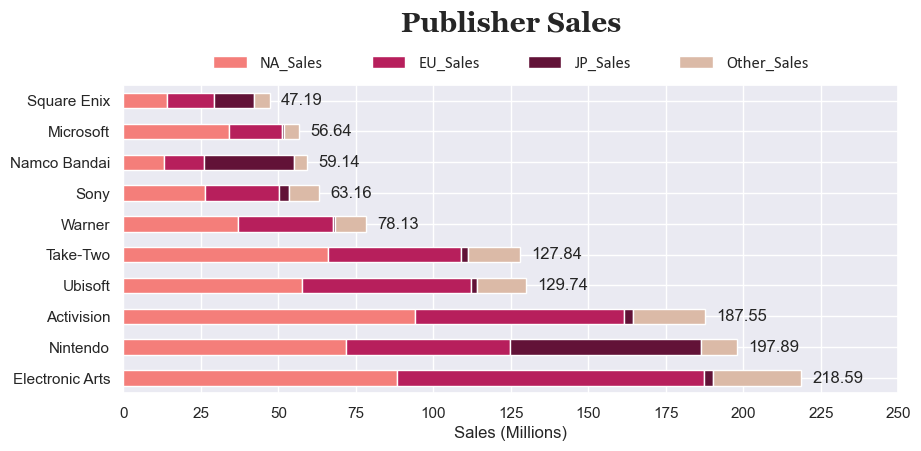

In [17]:
# Filter for only top 10 publishers
d4b = d4.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
d4b = d4b.sort_values(by='Global_Sales',ascending=False)
d4b = d4b[:10]
d4b = d4b.drop(columns='Global_Sales')
  
colors = ['#f47e7a', '#b71f5c', '#621237', '#dbbaa7']    

# Set figsize
sns.set(rc={'figure.figsize':(10,4)}) 

# Plot
ax = d4b.plot.barh(stacked=True,color=colors)

# Set legend
legend = plt.legend(loc='center',
       frameon=False,
       bbox_to_anchor=(0., 1.02, 1., .102), 
       mode='expand', 
       ncol=4, 
       borderaxespad=5,
       prop={'size': 12, 'family':'Calibri'})

# Shorten y labels and set them as ticks
y_ticks = []
for index in d4b.index:
    if len(index) > 18:
        index_split = index.split()
        index = index_split[0]
    elif len(index) > 15:
        index_split = index.split()
        index = index_split[0] + ' ' + index_split[1]
    y_ticks.append(index)
plt.yticks(np.arange(len(y_ticks)), y_ticks)

# Set Title
titlefont = {'fontname':'Georgia'} # title font
plt.title('Publisher Sales',fontsize=20,fontweight='bold',x=0.5, y=1.15,**titlefont)

# Labels
plt.xlabel('Sales (Millions)')
plt.ylabel('')

plt.xticks(np.arange(0,251,25),np.arange(0,251,25))

sns.set_style("dark")

# label the top of each bar
for i , container in zip(range(len(ax.containers)),ax.containers):
    if i == 3:
        ax.bar_label(container, padding=8)

plt.show()

### Bar Chart Analysis
Even among the top 10 publishers, there is a clear distinction between the publishers. Electronic Arts (EA), Nintendo and Activision have by far the largest number of global sales, with EA at the forefront with over 200 million global sales.

In terms of indivdual markets:
* Activision has the largest North America (NA) market
* EA has the largest Europe (EU) market
* Nintendo has the largest Japan (JP) market.

While analysis shows that EA, Nintendo and Activision have the highest global sales, this could potentially also be due to the fact that each company simply has more games and thus when all the players in each game are combined, it forms a large total sale count. Hence, this does not guarantee that a game published by this publisher will have high sales. However, this still shows us which publishers are the largest in terms of popularity which would translate into higher sales anyway.

### Application to our video game
We do not have a specific market that we want to target. Hence we can overlook the sales per region and just look at the global sales for each company. Based on global sales, Electronic Arts (EA) seems like our best option as our game publisher as it has the highest sales of all companies. In fact, while the difference looks minimal on the graph, the gap between the second highest seller Nintendo is still around 20 million sales which is a huge number.


##### Conclusion: In terms of publisher, our video game should be published by Electronic Arts (EA)

<div style='font-size: 40px; font-family: Georgia; font-weight:bold; text-align: center; padding-bottom:20px; padding-top:20px'>Conclusion</div>

To summarise each analysis:

**Analysis 1: Console Popularity Across Years (Line Plot)**
- The 5 most popular video game consoles over the past 6 years  in terms of game units sold are the PS4, XBOX, Nintendo Switch, 3DS and WiiU. Of these consoles. The PS4 is the most popular. The Nintendo Switch has been rising in popularity as of 2018, but is not an option as it only runs games created by Nintendo.

**Analysis 2: PC Platform Popularity (Pie Chart)**
- The 3 main PC platforms are Windows, Mac and Linux. Of these 3, Windows is the most used on Steam with 51% of the playerbase. Additionally, many games that can run on Mac and Linux were also designed to run on Windows.

**Analysis 3: Ratings for Genres (Boxplot)**
- Of the 10 genres analysed, the 3 'safest' genres are Sports, Racing and MMO. By 'safest' we are referring to genres that have the fewest low-rated games. However, all 3 of these genres are similar in terms of the distribution of popularity of their games. Hence, to determine best genre among these 3, a violin plot was used in analysis 4.

**Analysis 4: Popularity of Sports, Racing and MMO Genres (Violin Plot)**
- Between Sports, Racing and MMO, the 'safest' genre was the MMO genre as it had more players in its higher ranges as compared to Sports and Racing.

**Analysis 5: Reviews against Game Price (Scatter Plot)**
- More expensive games tend to have poorer reviews. Thus we should lower our game price. Many games are priced at \\$20 and below, thus a competitive price would be below \$20.

**Analysis 6: Publisher Sales (Bar Chart)** 
- The top 3 publishers are Electronic Arts (EA), Nintendo and Activision. Each of these publishers also have the top sales in a certain region; Europe, North America and Japan respectively. However, the highest selling publisher overall is Electronic Arts (EA)

With the analysis done, we can finally put together what elements will help us to make the perfect video game.

> - Console Platform: **PS4**
> - PC Platform: **Windows**
> - Genre: **MMO**
> - Price: **<\\$20**
> - Publisher: **Electronic Arts (EA)**


Of course, creating a successful video game goes beyond just these 5 aspects. Within the MMO genre there are a multitude of subgenres and other possible genres that could be added on top of the MMO foundation. Amongst publishers, some may be more willing to accept a game from a no-name company than others. While there are possible future concerns, this analysis helps us to create a starting point for our video game using past video game statistics. 



<div style='font-size: 40px; font-family: Georgia; font-weight:bold; text-align: center; padding-bottom:20px; padding-top:20px; font-style:italic'>~Fin~</div>